**Como primer punto se enlaza al drive para obtener el dataset y asi poder realizar un cuadernillo.
El dataset que se incluye en este cuadernillo es el de "detección de fraude", donde se quiere conocer el conjunto de datos que contiene todos los detalles de las transacciones con la tarjeta de crédito, para saber si una es fraudulenta o no **





In [36]:
import numpy as np
import pandas as pd
from google.colab import drive
from matplotlib import pyplot
from scipy import optimize
%matplotlib inline

En esta primera liberia se importan los datos que tiene el dataset.


In [37]:
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


AquÍ fue lo que hizo fue importacion de los dataset en el drive

In [38]:
data = pd.read_csv("/content/drive/MyDrive/Dataset Machine learning/creditcard.csv")
data = np.array(data)
x = data[:227845,:30]
y = data[:227845,30]
m_ejemplos = y.size
print(x)
print(y)

[[ 0.00000000e+00 -1.35980713e+00 -7.27811730e-02 ...  1.33558377e-01
  -2.10530530e-02  1.49620000e+02]
 [ 0.00000000e+00  1.19185711e+00  2.66150712e-01 ... -8.98309900e-03
   1.47241690e-02  2.69000000e+00]
 [ 1.00000000e+00 -1.35835406e+00 -1.34016307e+00 ... -5.53527940e-02
  -5.97518410e-02  3.78660000e+02]
 ...
 [ 1.45245000e+05 -1.78195369e+00  2.06267984e+00 ...  7.77661834e-01
   2.72752627e-01  3.59280000e+02]
 [ 1.45245000e+05 -6.15073310e-02  1.02490050e+00 ... -4.89159930e-02
   2.38705530e-02  3.94000000e+01]
 [ 1.45247000e+05  2.05003394e+00 -1.03557489e-01 ... -7.45292510e-02
  -7.42789230e-02  1.70000000e-01]]
[0. 0. 0. ... 0. 0. 0.]


Se importo la ruta de los dataset.
Donde el array viene a ser lista de datos donde se va a convertir un vector.
donde las variables de  "x" viene a ser los numeros de caracteristicas en un rango donde el numero 30 es el limite y la variable "y" vendria a ser lo ejemplos del dataset.

Donde tambien se trabajo el 80% de los datos para entrenas y el 20% para aprobar la efectividad, como se ve mas adelante.

In [39]:
x.shape

(227845, 30)

x.shape me permite ver el indice de columnas y filas.

In [40]:
def plotData(x,y):
  fig = pyplot.figure()
  pos = y == 1
  neg = y == 0
  pyplot.plot(x[pos, 0], x[pos, 1], 'k*', lw=2, ms=10)
  pyplot.plot(x[neg, 0], x[neg, 1], 'ko', mfc='y', ms=8, mec='k', mew=1)

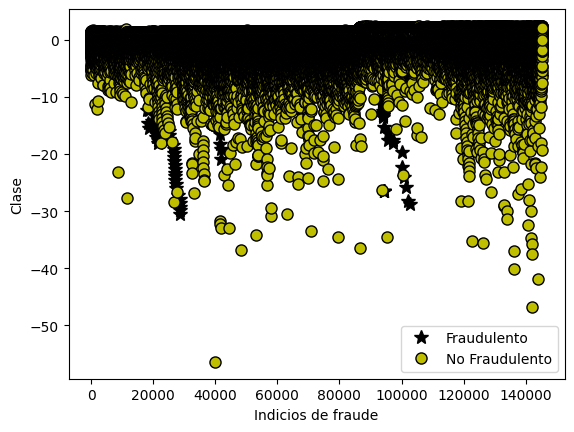

In [41]:
plotData(x, y)
pyplot.xlabel('Indicios de fraude')
pyplot.ylabel('Clase')
pyplot.legend(['Fraudulento', 'No Fraudulento'])
pass

In [42]:
def funcionSigmoidea(z):
  z = np.array(z)
  g = np.zeros(z.shape)
  g = 1/(1+np.exp(-z))
  return g

con la funcion sigmoidea, se procesa los datos para obtener un resultado entre 0 y 1

In [43]:
z = [0, 0.5, 1]
g = funcionSigmoidea(z)

print('g(', z, ') = ', g)

g( [0, 0.5, 1] ) =  [0.5        0.62245933 0.73105858]


In [44]:
def normalizarX(x):
  x_normalizada = []
  promedio = np.mean(x,axis=0)
  x = x.astype(float)
  desviacion_estandar = np.std(x,axis=0)
  for i in range(m_ejemplos):
    caracteristicas_x = []
    for j in range(x.shape[1]):
      if desviacion_estandar[j] != 0:
        caracteristicas_x.append((x[i,j]-promedio[j])/desviacion_estandar[j])
      else:
        caracteristicas_x.append(0)
    x_normalizada.append(caracteristicas_x)
  return x_normalizada, promedio, desviacion_estandar

Al normalizar hace que los valores sean mas pequeños.
donde tambien saca el promedio de las colunmas de "x" para asi no tener valores de 0 o error.

In [45]:
x_normalizada, promedio, desviacion_estandar = normalizarX(x)
x_normalizada = np.array(x_normalizada)
x = np.concatenate((np.ones((m_ejemplos,1)),x_normalizada),axis=1)

A quí se hace las menciones de las caracteristicas para asi poderse guardar.

In [46]:
def calcularCosto(x, y, theta):
  J = 0
  hipotesis = funcionSigmoidea(x.dot(theta.T))
  J = (1 / m_ejemplos) * np.sum(-y.dot(np.log(hipotesis)) - (1 - y).dot(np.log(1 - hipotesis)))

  return J

Con el costo se puede ver cada interaccion que se pueda ajustar a taza de proximidad

In [47]:
def descensoGradiente(x,y,theta,alpha,n_iteraciones):
  historial_J = []
  theta = theta.copy()
  for i in range(n_iteraciones):
    hipotesis = funcionSigmoidea(x.dot(theta.T))
    theta = theta-(alpha/m_ejemplos)*(hipotesis-y).dot(x)
    historial_J.append(calcularCosto(x,y,theta))

  return theta, historial_J

Con esta formula define la ecuacion para hallar la recta.

In [48]:
def hallarTheta():
  theta = np.zeros(x.shape[1])
  n_iteraciones = 2500
  alpha = 0.005
  theta, historial_J = descensoGradiente(x,y,theta,alpha,n_iteraciones)
  return theta, historial_J

In [49]:
theta, historial_J = hallarTheta()
print("Las thetas encontradas son: ",theta)
print("El menor costo que se pudo determinar fue de: ",historial_J[-1])

Las thetas encontradas son:  [-2.39646120e+00 -1.89124036e-03 -2.00863921e-02  1.94272729e-02
 -4.05537963e-02  2.92406685e-02 -1.84590025e-02 -8.82264158e-03
 -3.90582606e-02  1.25114845e-03 -2.09745541e-02 -4.74393074e-02
  3.35030824e-02 -5.68841950e-02 -1.35152105e-03 -6.67124366e-02
 -1.28691297e-03 -4.21629552e-02 -6.92285544e-02 -2.32063916e-02
  7.19652253e-03  3.12423525e-03  9.15227457e-03  9.39864151e-04
 -8.79276126e-04 -1.52636667e-03 -2.96367772e-04  1.16666622e-03
  3.33410248e-03  1.43088199e-03  1.60771505e-03]
El menor costo que se pudo determinar fue de:  0.08856457589138324


Con theta hallamos lo que es x sub 1, x sub 2, x sub 3 etc.
Donde multipica a los valores de una función.
Y donde tambien theta se define al numero de interacciones para ajustar la curva de costo y el coeficiente alpha.

Text(0, 0.5, 'Costo J')

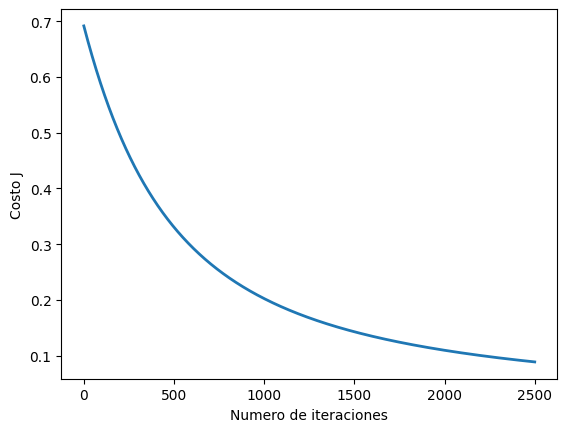

In [52]:
pyplot.plot(np.arange(len(historial_J)), historial_J, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

El numero de interaccion es de 2500 ya que se aproxima a 0,1, que nos sugiere un buen ajuste

In [81]:
def predecir(theta):
  y_predecir = data[227846:,:30]
  m_predecir = y_predecir.shape[0]
  columna_zeros = np.zeros((m_predecir,1))
  y_predecir = np.append(columna_zeros,y_predecir,axis = 1)
  p = np.round(funcionSigmoidea(y_predecir.dot(theta.T)))
  return p

In [82]:
p = predecir(theta)
y_predecir = data[227846:,30]
print('Precisión de entrenamiento: {:.2f} %'.format(np.mean(p==y_predecir) * 100))

Precisión de entrenamiento: 99.87 %


Conclusion:
con una mayor cantidad de datos se puede tener una precision de entrenamiento elevada para que las predicciones arrojen el mejor resultado posible